## Loading Libraries


In [1]:
import matplotlib.pyplot as plt
import sklearn.metrics as mt
import sklearn
from sklearn.metrics import confusion_matrix

## Loading MNIST Dataset

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

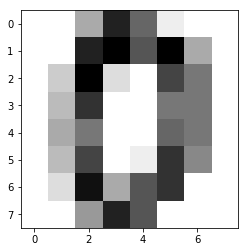

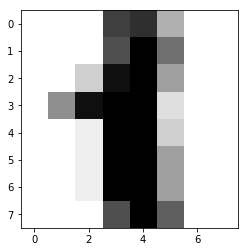

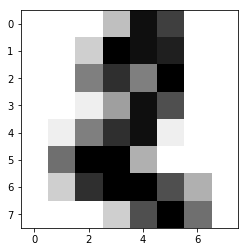

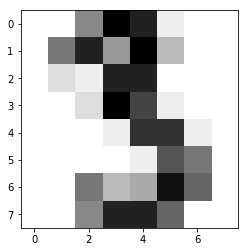

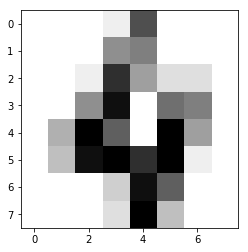

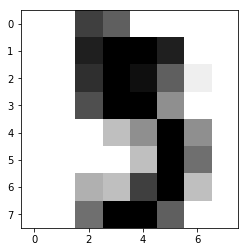

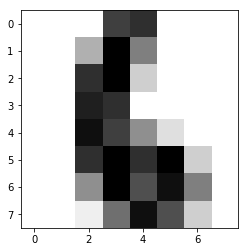

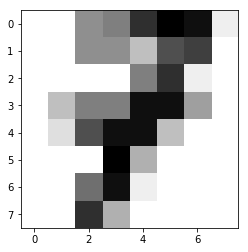

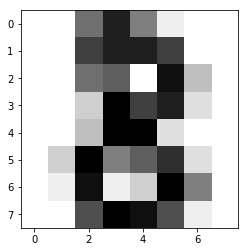

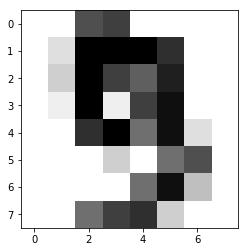

In [3]:
for i in range(0,10):
  plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
  plt.show()

## Selecting Features and Labels

In [4]:
X=digits.data
y=digits.target

In [6]:
print("X shape", X.shape)
print("Label shape", y.shape)

X shape (1797, 64)
Label shape (1797,)


In [7]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
x_train.shape

(1078, 64)

In [9]:
x_test.shape

(719, 64)

## Feature Scaling-Applying Standard Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [11]:
# Fitting on training set only.
std_scaler.fit(x_train)

# Applying transform to both the training set and the test set.
x_train_scalar = std_scaler.transform(x_train)
x_test_scalar = std_scaler.transform(x_test)

## Applying Principal Component Analysis

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(0.99)

In [17]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
x_train_pca = pca.transform(x_train_scalar)
x_test_pca =  pca.transform(x_test_scalar)

## Applying Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
reg=LogisticRegression()

In [23]:
predict_op=reg.predict(x_test_pca)

## Accuracy Score

In [24]:
class_accuracy=mt.accuracy_score(y_test, predict_op)
print(class_accuracy)

0.9707927677329624


## Confusion Matrix

In [25]:
con_matrix=confusion_matrix(y_test,predict_op)
print(con_matrix)

[[67  0  0  0  0  0  0  0  0  0]
 [ 0 69  1  0  0  0  0  0  2  0]
 [ 0  0 66  0  0  0  0  0  0  0]
 [ 0  0  0 69  0  0  0  1  1  0]
 [ 0  0  0  0 78  0  0  0  0  0]
 [ 0  1  0  0  0 79  1  1  0  1]
 [ 0  0  0  0  0  1 68  0  0  0]
 [ 0  0  0  0  0  0  0 70  0  1]
 [ 0  3  0  0  0  1  0  0 60  1]
 [ 0  0  0  2  0  1  0  0  2 72]]


## Classification Report

In [26]:
class_report=mt.classification_report(y_test,predict_op)
print(class_report)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        67
          1       0.95      0.96      0.95        72
          2       0.99      1.00      0.99        66
          3       0.97      0.97      0.97        71
          4       1.00      1.00      1.00        78
          5       0.96      0.95      0.96        83
          6       0.99      0.99      0.99        69
          7       0.97      0.99      0.98        71
          8       0.92      0.92      0.92        65
          9       0.96      0.94      0.95        77

avg / total       0.97      0.97      0.97       719

